In [1]:
import sympy as sym
from sympy.utilities.lambdify import lambdify
from functools import partial
from itertools import product
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib inline
sym.init_printing(use_unicode=True)
mpl.style.use('seaborn-talk')


In [3]:
x, t, z, = sym.symbols('x t z')
pi, psi, phi,zeta1, zeta2, xi = sym.symbols('pi, psi, phi zeta_1, zeta_2, xi', real=True)
c, rho, delta = sym.symbols('c, rho, delta', positive=True, real=True)

## Define the relevant variables

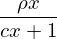

In [4]:
a = (rho * x) / (1 + c * x)
a

In [5]:
b = delta * sym.log(1 + c * x)
b

In [6]:
xi_val = phi / sym.sqrt(c * ( 1 + rho))

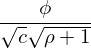

In [7]:
xi_val

In [39]:
psi_val = xi_val + xi_val * (zeta2 - sym.Rational(1/2))

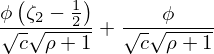

In [40]:
psi_val

In [10]:
alpha = (xi / 2) * x**2 + psi * x

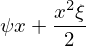

In [11]:
alpha

In [12]:
beta = (a.replace(x, zeta1 + alpha.replace(x, zeta2 - 1)) - 
           (a.replace(x, zeta1 + alpha.replace(x, zeta2))) 
    - (zeta2 - sym.Rational(1/2)) * ((xi-1) * rho + 2 * c * rho * psi**2))

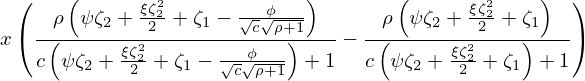

In [84]:
beta

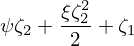

In [21]:
arg1 = zeta1 + alpha.replace(x, zeta2)
arg1

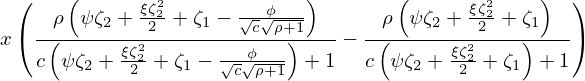

In [41]:
beta = x * (a.replace(x, - xi_val + arg1) - a.replace(x, arg1))
beta

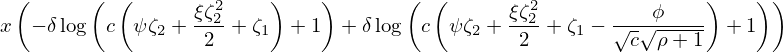

In [43]:
gamma = x * (b.replace(x, - xi_val + arg1) - b.replace(x, arg1))
gamma

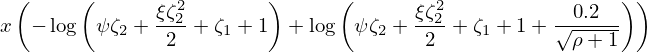

In [44]:
gamma.replace(c,1).replace(delta, 1).replace(phi, -.2)

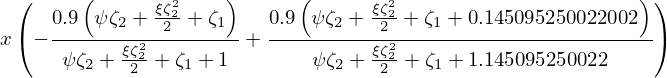

In [45]:
beta.replace(c,1).replace(delta, 1).replace(rho, .9).replace(phi, -.2)

## I now take the derivatives

### a(x)

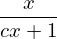

In [46]:
a.diff(rho,1)

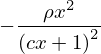

In [47]:
a.diff(c, 1)

### b(x)

In [48]:
b.diff(delta, 1)

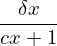

In [49]:
b.diff(c, 1)

### $\alpha(x)$

In [81]:
zeta2val = sym.solveset(alpha.diff(phi, 1), zeta2).args[0]

In [83]:
alpha.diff(phi)

In [52]:
alpha.diff(zeta2, 1)

In [53]:
alpha.diff(c, 1)

### $\beta(x)$

In [29]:
beta.diff(phi, 1).simplify()

In [30]:
beta.diff(phi,1)

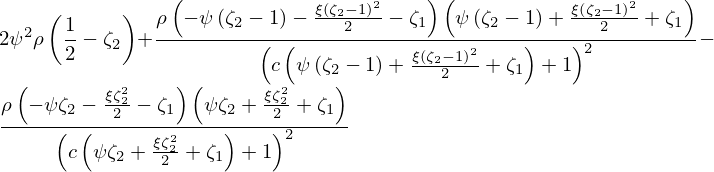

In [31]:
beta.diff(c,1)

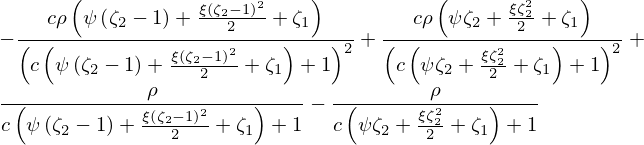

In [34]:
sym.diff(beta, zeta1)

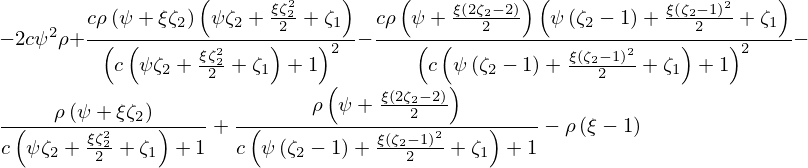

In [35]:
sym.diff(beta, zeta2)

### $\gamma(x)$

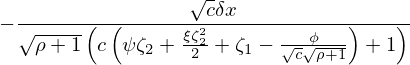

In [54]:
sym.diff(gamma, phi)

In [80]:
sym.sympify(sym.diff(gamma, zeta1).replace(zeta2,zeta2val).replace(x,1))

NameError: name 'zeta2val' is not defined

In [56]:
theta2val

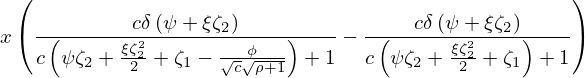

In [78]:
sym.diff(gamma, zeta2)

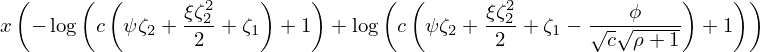

In [58]:
sym.diff(gamma, delta)

## Lack of identification issue

In [62]:
sym.diff(gamma.replace(phi, 0), zeta1)

In [64]:
sym.diff(beta.replace(phi, 0), zeta1)

In [65]:
sym.diff(gamma.replace(zeta2, 0), zeta2)

### Parameter Estimates from Renault (Gmm Step)

rho : 0.95
delta : 1.25
phi : -0.30
theta2 : 0.53

In [67]:
sym.diff(gamma, zeta1).replace(phi, 0)

In [77]:
gamma_func = partial(lambdify((c, delta, rho, zeta2, zeta1, x, phi), sym.diff(gamma, zeta1)),
                     1, 1.25, .95, .53, -7, .5)

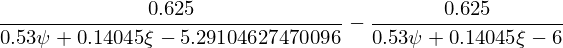

In [76]:
gamma_func(-.99)

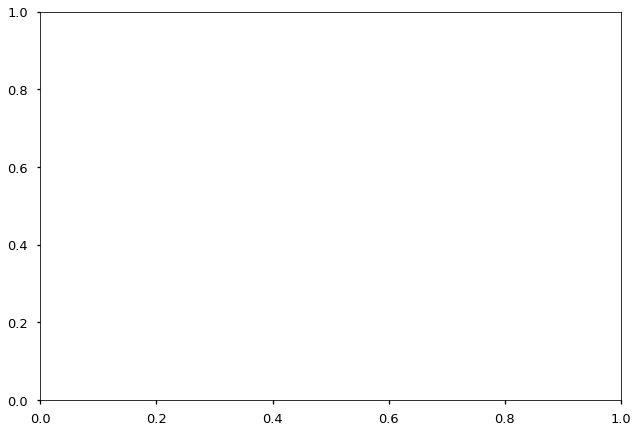

In [73]:


gamma_diff_fig, gamma_diff_ax = mpl.pyplot.subplots()
xvals = np.linspace(-.99, .99, 100)
# yvals = [gamma_func(val) for val in xvals]
# gamma_diff_ax.set_xlabel('$\phi$')
# gamma_diff_ax.plot(xvals, yvals)
# gamma_diff_ax.axhline(0, color='grey')
# gamma_diff_ax.axvline(0, color='grey')
# gamma_diff_ax.set_yticklabels([])
# gamma_diff_fig.savefig('../doc/figures/gamma_diff_theta2.tmp.pdf', frameon=False, transparent=True,
#                        bbox_inches='tight',pad_inches=0)

In [ ]:
beta_func = partial(lambdify((c, delta, rho, theta2, theta1, x, phi), sym.diff(beta, theta1)),
                     1, 1.25, .95, .53, -7, .5)

In [ ]:
beta_diff_fig, beta_diff_ax = mpl.pyplot.subplots()
beta_xvals = np.linspace(-.99, .99, 100)
beta_yvals = [beta_func(val) for val in xvals]
beta_diff_ax.set_ylabel('$\phi$')
beta_diff_ax.plot(xvals, yvals)
beta_diff_ax.axhline(0, color='grey')
beta_diff_ax.axvline(0, color='grey')

### Solving for $\psi$

In [ ]:
phi

In [ ]:
pi, psi, phi,theta, alpha = sym.symbols('pi, psi, phi theta, alpha', real=True)


In [ ]:
alpha = psi * x + (1 - phi**2 / 2) * x**2

In [ ]:
alpha

In [ ]:
c

In [ ]:
chi = 1 + c * (pi + alpha.replace(x,theta))

In [ ]:
chi

In [ ]:
sym.Rational(3/2)

In [ ]:
umm = -psi + (phi * chi**sym.Rational(3/2)) / (sym.sqrt(c) * sym.sqrt(chi**2 - rho)) + (1 - phi**2) /2 - ( 1 - phi**2) * theta

In [ ]:
umm

In [ ]:
umm.replace(phi, 0)

In [ ]:
umm.diff(phi)

In [ ]:
sym.solveset(-psi + phi / sym.sqrt((c / chi) * (3 - rho / chi**2)) + (1 - phi**2) / 2 - ( 1 - phi**2) * theta, psi)

In [ ]:
psi.simplify()